In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image

In [54]:
def plot_3_lines(df, title):
    # Create figure and subplot manually
    # fig = plt.figure()
    # host = fig.add_subplot(111)

    # More versatile wrapper
    fig, host = plt.subplots(figsize=(8,3), layout='constrained') # (width, height) in inches
    # (see https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.subplots.html and
    # .. https://matplotlib.org/stable/tutorials/intermediate/constrainedlayout_guide.html)
        
    ax2 = host.twinx()
    ax3 = host.twinx()
        
    # host.set_xlim(0, 0.40)
    # host.set_ylim(22, 35) # PSNR 
    # ax2.set_ylim(0.5, 1) # SSIM
    # ax3.set_ylim(0, 700) # MSE
        
    host.set_xlabel("Lambda")
    host.set_ylabel("PSNR")
    ax2.set_ylabel("SSIM")
    ax3.set_ylabel("MSE")

    # color1, color2, color3 = plt.cm.viridis([0, .5, .9])
    # color1, color2, color3 = "blue", "red", "green"
    color1, color2, color3 = "blue", "red", "green"

    df = df.head(40)

    p1 = host.plot(df["lambda"], df["psnr"], 
                   color=color1, 
                   label="PSNR")
    p2 = ax2.plot(df["lambda"], df["ssim"], 
                  color=color2, 
                  label="SSIM")
    p3 = ax3.plot(df["lambda"], df["mse"], 
                  color=color3, 
                  label="MSE",
                   alpha=0.8)

    host.legend(handles=p1+p2+p3, 
                # loc='best',
                loc='lower right',
                )

    # right, left, top, bottom
    ax3.spines['right'].set_position(('outward', 60))

    # # no x-ticks                 
    # host.xaxis.set_ticks([])

    # Alternatively (more verbose):
    # host.tick_params(
    #     axis='x',          # changes apply to the x-axis
    #     which='both',      # both major and minor ticks are affected
    #     bottom=False,      # ticks along the bottom edge are off)
    #     labelbottom=False) # labels along the bottom edge are off
    # sometimes handy:  direction='in'    

    # Move "Velocity"-axis to the left
    # ax3.spines['left'].set_position(('outward', 60))
    # ax3.spines['left'].set_visible(True)
    # ax3.spines['right'].set_visible(False)
    # ax3.yaxis.set_label_position('left')
    # ax3.yaxis.set_ticks_position('left')

    host.yaxis.label.set_color(p1[0].get_color())
    ax2.yaxis.label.set_color(p2[0].get_color())
    ax3.yaxis.label.set_color(p3[0].get_color())

    # For professional typesetting, e.g. LaTeX, use .pgf or .pdf
    # For raster graphics use the dpi argument. E.g. '[...].png", dpi=300)'
    plt.savefig("pyplot_multiple_y-axis.pdf", bbox_inches='tight')
    # bbox_inches='tight': Try to strip excess whitespace
    # https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.savefig.html




def show_example():
    base_results_path = "results/results_2024_06_09_23_16_40"
    images_path = f"{base_results_path}/best_images"
    folders = os.listdir(images_path)
    folders = [int(folder) for folder in folders]
    folders.sort()
    # print(folders)
    folder = folders[100]
    # folder = folders[145]
    # for folder in folders:
    for i in range(1):
        # print(f"folder: {folder}")
        folder_path = f"{images_path}/{folder}"

        csv_file = f"{folder_path}/lambda_vals.csv"
        df = pd.read_csv(csv_file)
        # print(df.head(20))
        plot_3_lines(df, "Metrics vs lambda")

        files = os.listdir(folder_path)
        images = []
        for file in files:
            if file.endswith("csv"):
                continue
            image = Image.open(os.path.join(folder_path, file))
            images.append((image, file))
        assert len(images) == 6
        # Swap the second and fourth
        images[1], images[3] = images[3], images[1]
        # Swap the third and fifth
        images[2], images[4] = images[4], images[2]

        # plt.figure(figsize=(15, 10))
        plt.figure(figsize=(12, 3))
        for i, (image, file) in enumerate(images):
            # plt.subplot(2, 3, i+1)
            plt.subplot(1, 4, i+1)
            plt.imshow(image, cmap='gray')
            plt.axis('off')
            plt.title(file, fontsize=6)
            if i == 3:
                break
        plt.show();
        break

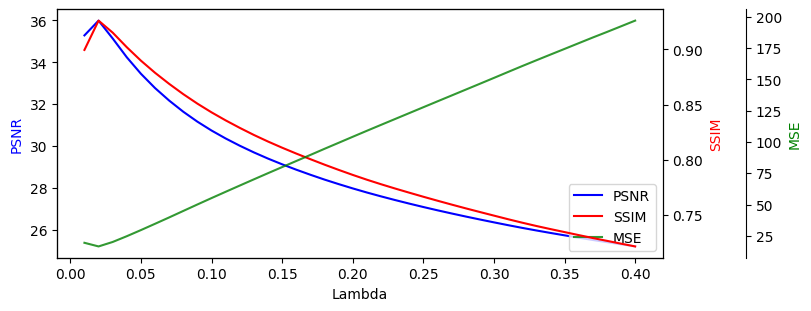

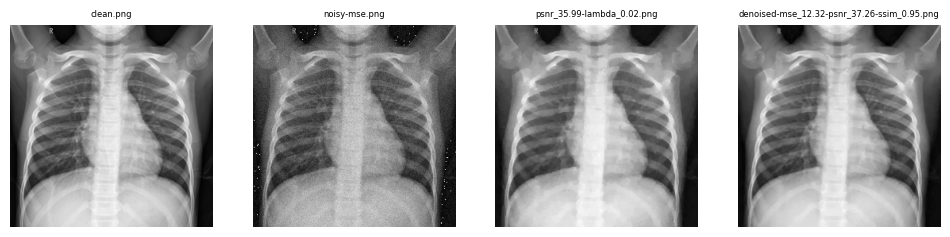

In [55]:
show_example()

In [52]:
def multi_box_plot(df):
    # # create random dataframe with different scales
    # df = pd.DataFrame(np.random.rand(30, 5), columns=['A', 'B', 'C', 'D', 'E'])
    # df['A'] *= 5
    # df['C'] *= 10
    # df['E'] *= 15

    # create boxplot with a different y scale for different rows
    # selection = ['A', 'C', 'E']
    # fig, axes = plt.subplots(1, len(selection))
    selection = df.columns
    fig, axes = plt.subplots(1, len(selection), figsize=(10, 2))
    # Make a list of 3 different colors
    colors = ['blue', 'red', 'green', 'blue', 'red', 'green']
    ids = [0, 2, 4, 1, 3, 5]
    
    for i, col in enumerate(selection):
        ax = sns.boxplot(y=df[col], ax=axes.flatten()[i], color=colors[i // 2])
        ax.set_ylim(df[col].min(), df[col].max())
        ax.set_ylabel(col + ' / Unit')
        # Increase horizontal space between subplots
        fig.tight_layout()
        # Set the color of the boxplot
        # ax.artists[0].set_facecolor(colors[i])
        # ax.set_facecolor(colors[i])


        
    plt.show()

def show_single_lambda_box_plot():
    base_results_path = "results/results_2024_06_09_23_16_40"
    single_lambda_csv_path = f"{base_results_path}/best_single_lambda.csv"

    df = pd.read_csv(single_lambda_csv_path)
    # print(df.head(20))

    # # Drop rows with mse < 10
    # df = df[df["mse"] > 10]
    # # Drop rows with mse > 20
    # df = df[df["mse"] < 20]
    # # Drop rows with PSNR > 50
    # df = df[df["psnr"] < 40]

    # # Histograms
    # plt.figure(figsize=(8, 5))
    # sns.histplot(df["mse_single"], bins=100)
    # plt.title("MSE histogram")
    # plt.show();

    # plt.figure(figsize=(8, 5))
    # sns.histplot(df["psnr_single"], bins=100)
    # plt.title("PSNR histogram")
    # plt.show();

    # plt.figure(figsize=(8, 5))
    # sns.histplot(df["ssim_single"], bins=100)
    # plt.title("SSIM histogram")
    # plt.show();



    # Boxplot for mse
    plt.figure(figsize=(8, 5))
    sns.boxplot(y="mse_single", data=df)
    plt.title("MSE vs lambda")
    plt.show();

    # Boxplot for psnr
    plt.figure(figsize=(8, 5))
    sns.boxplot(y="psnr_single", data=df)
    plt.title("PSNR vs lambda")
    plt.show();

    # Boxplot for ssim
    plt.figure(figsize=(8, 5))
    sns.boxplot(y="ssim_single", data=df)
    plt.title("SSIM vs lambda")
    plt.show();

    # Plot the box plots on the same figure
    plt.figure(figsize=(8, 5))
    # sns.boxplot(y="mse_single", data=df, color="blue")
    # sns.boxplot(y="psnr_single", data=df, color="red")
    # sns.boxplot(y="ssim_single", data=df, color="green")
    # plt.title("Metrics vs lambda")
    plt.boxplot([df["mse_single"], df["psnr_single"], df["ssim_single"]])
    plt.xticks([1, 2, 3], ["MSE", "PSNR", "SSIM"])
    plt.show();

    multi_box_plot(df)


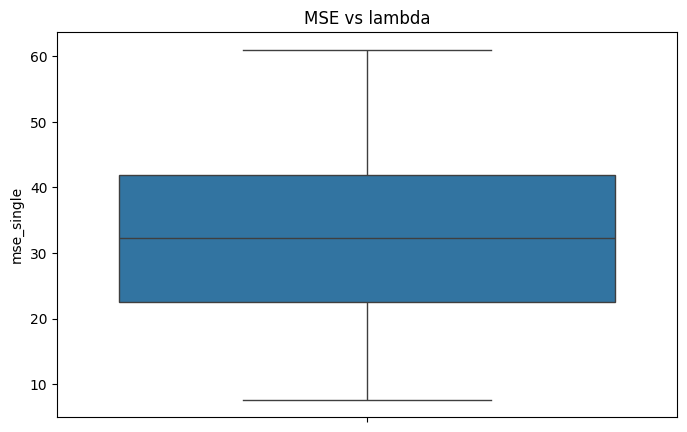

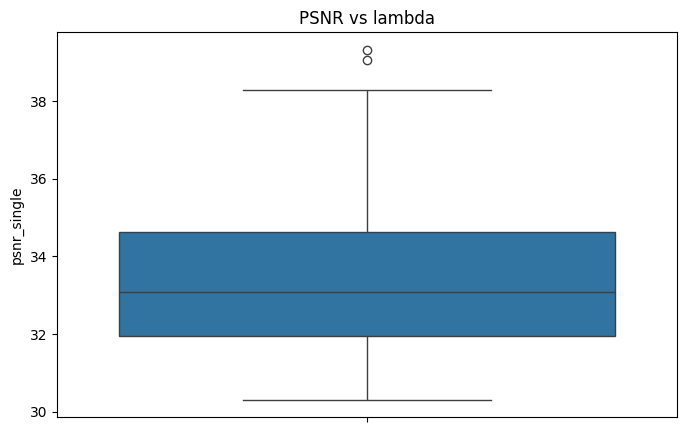

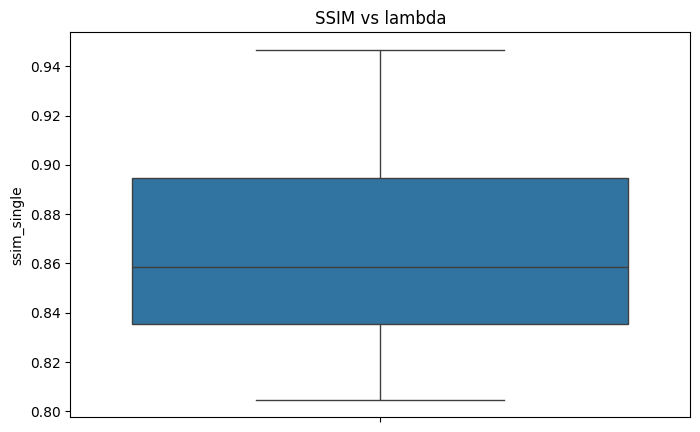

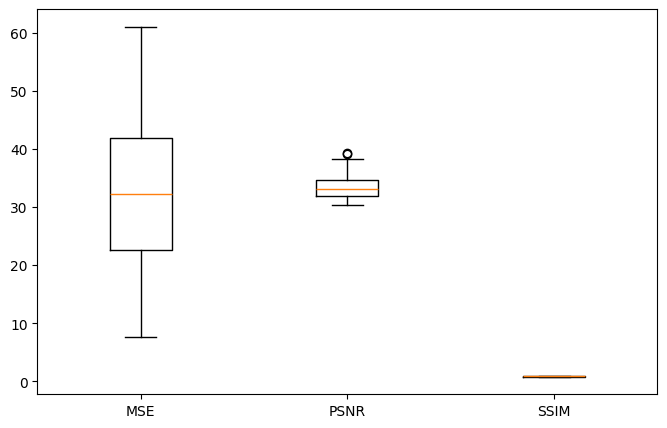

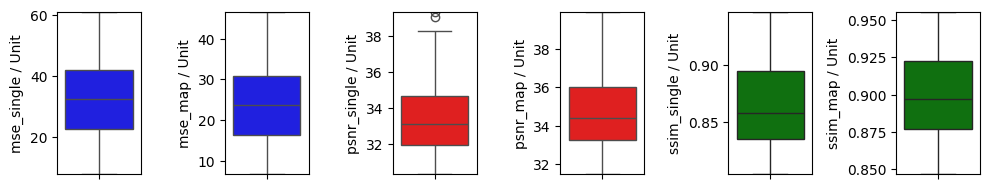

In [53]:
show_single_lambda_box_plot()